<a href="https://colab.research.google.com/github/StevenBryceLee/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/Copy_of_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [ ]:
# Your Work Here
#import the file and take a look
import pandas as pd
raw_df = pd.read_csv('new-voter-registrations.csv')
raw_df.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


In [ ]:
#Looks like headers are included. Are nulls present?
raw_df.isnull().any()

Jurisdiction             False
Year                     False
Month                    False
New registered voters    False
dtype: bool

In [ ]:
#No nulls, but this data is incomplete. No mention of in person vs remote
#Checking to see if I can find it. This should be Florida data
FL_data = 'voter-registration-applications-received-by-source-and-county-2020.xlsx'

fl_df = pd.read_excel(FL_data, skiprows=3)

fl_df.head()

,County,Department Of Highway Safety And Motor Vehicles,Mail,Public Assistance,Disability,Armed Forced Recruiters,Public Library,Third Party Voter Registration Organization,Online Voter Registration,Supervisor Of Elections,Total
0,Alachua,347,55,3,6,0,1,169,98,324,1003
1,Baker,25,4,0,0,0,0,0,22,33,84
2,Bay,497,81,17,0,0,1,9,135,13,753
3,Bradford,35,1,0,0,0,0,6,6,9,57
4,Brevard,1544,303,12,0,0,0,461,221,114,2655


In [ ]:
fl_df.tail()

,County,Department Of Highway Safety And Motor Vehicles,Mail,Public Assistance,Disability,Armed Forced Recruiters,Public Library,Third Party Voter Registration Organization,Online Voter Registration,Supervisor Of Elections,Total
63,Volusia,1268,311,3,1,0,24,449,208,45,2309
64,Wakulla,38,13,0,0,0,0,7,20,14,92
65,Walton,223,0,2,0,0,7,27,36,34,329
66,Washington,37,0,0,0,0,0,0,11,9,57
67,TOTALS,42498,9750,277,25,8,292,14144,10482,8769,86245


In [ ]:
#Checking other states, I need to request voter data via form. 
#Pet peeve. Why not just post it for free online?

In [ ]:
#Each month is posted on a different sheet, meaning I need to concat
#Could do with a multi-index, but I think it would be easier with separate dfs
df_list = [pd.read_excel(FL_data, skiprows=3,sheet_name = x) for x in range(4)]
len(df_list)

4

In [ ]:
df_list[0].head()

,County,Department Of Highway Safety And Motor Vehicles,Mail,Public Assistance,Disability,Armed Forced Recruiters,Public Library,Third Party Voter Registration Organization,Online Voter Registration,Supervisor Of Elections,Total
0,Alachua,347,55,3,6,0,1,169,98,324,1003
1,Baker,25,4,0,0,0,0,0,22,33,84
2,Bay,497,81,17,0,0,1,9,135,13,753
3,Bradford,35,1,0,0,0,0,6,6,9,57
4,Brevard,1544,303,12,0,0,0,461,221,114,2655


In [ ]:
#Now I have dfs for jan, feb, march, april
df_list[0].tail()

,County,Department Of Highway Safety And Motor Vehicles,Mail,Public Assistance,Disability,Armed Forced Recruiters,Public Library,Third Party Voter Registration Organization,Online Voter Registration,Supervisor Of Elections,Total
63,Volusia,1268,311,3,1,0,24,449,208,45,2309
64,Wakulla,38,13,0,0,0,0,7,20,14,92
65,Walton,223,0,2,0,0,7,27,36,34,329
66,Washington,37,0,0,0,0,0,0,11,9,57
67,TOTALS,42498,9750,277,25,8,292,14144,10482,8769,86245


In [ ]:
#Getting totals from each df_list for each month for remote_types
remote_types = ['Mail','Online Voter Registration']
sum(df_list[0][remote_types].loc[len(df_list[0])-1,:].tolist())

20232

In [ ]:
in_person_types = [type for type in df_list[0].columns.tolist() if type not in remote_types]
in_person_types.remove('County')
in_person_types.remove('Total')
in_person_types

['Department Of Highway Safety And Motor Vehicles',
 'Public Assistance',
 'Disability',
 'Armed Forced Recruiters',
 'Public Library',
 'Third Party Voter Registration Organization',
 'Supervisor Of Elections']

In [ ]:
#Each value will be the sum of remote or in person by month
month_list = ['Jan','Feb','Mar','Apr']

In [ ]:
#Use the above formula to sum per month
remote_series = [sum(df_list[month][remote_types]
                     .loc[len(df_list[month])-1,:].tolist()) for 
                      month in range(len(df_list))]
remote_series

[20232, 50200, 20042, 17135]

In [ ]:
#Do the same for in person registration
in_person_series = [sum(df_list[month][in_person_types]
                        .loc[len(df_list[month])-1,:].tolist()) for 
                          month in range(len(df_list))]
in_person_series

[66013, 68761, 39042, 5382]

In [ ]:
#Create the df for the graph
df = pd.DataFrame(data = [remote_series,in_person_series],columns = month_list)
df

,Jan,Feb,Mar,Apr
0,20232,50200,20042,17135
1,66013,68761,39042,5382


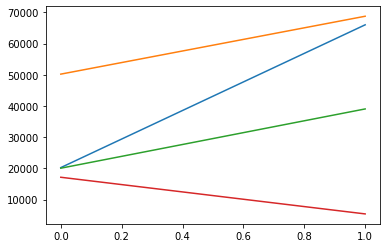

In [ ]:

import matplotlib.pyplot as plt
plt.plot(df)

In [ ]:
#Need to reshape
df1 = df.T
df1.columns = ['Remote','In Person']
df1

,Remote,In Person
Jan,20232,66013
Feb,50200,68761
Mar,20042,39042
Apr,17135,5382


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


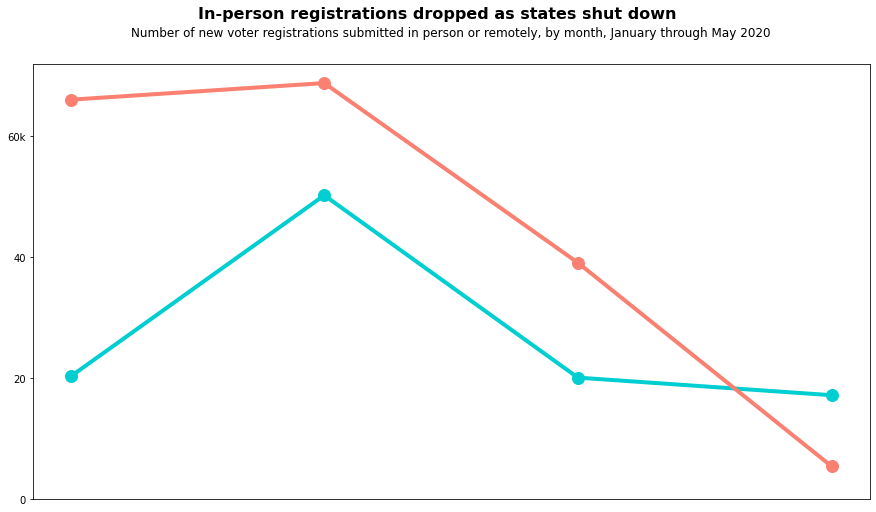

In [ ]:
#For clarity, making this for florida, since other data is unavailable
#https://fivethirtyeight.com/wp-content/uploads/2020/06/rogers-rakich.VOTER-REGISTRATION-2.0622.png?w=1024

ax = df1.plot(color = ['darkturquoise','salmon'],figsize=(15, 8),marker='o',markersize=12,
              linewidth=4.0)
#Take out the legend
ax.get_legend().remove()
#Turn the yticks into 0
plt.yticks(ticks=[0,20000,40000,60000],labels=['0',"20","40","60k"])
#Remove xticks
plt.xticks(ticks=[])
#Define super title and title
plt.suptitle("""In-person registrations dropped as states shut down""", 
             fontsize = 16, ha = 'center', fontweight = 'bold')
plt.title('Number of new voter registrations submitted in person or remotely, by month, January through May 2020', 
          fontsize = 12, ha = 'center', y = 1.05)
#remove x label
plt.axes().xaxis.label.set_visible(False)

plt.show();

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [ ]:
# More Work Here
#Let's reproduce this thing
#https://seaborn.pydata.org/examples/cubehelix_palette.html
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Default way
sns.set(style='dark')
#Alternate
sns.set_style('dark')

In [ ]:
#Reproducibility line
rs = np.random.RandomState(42)



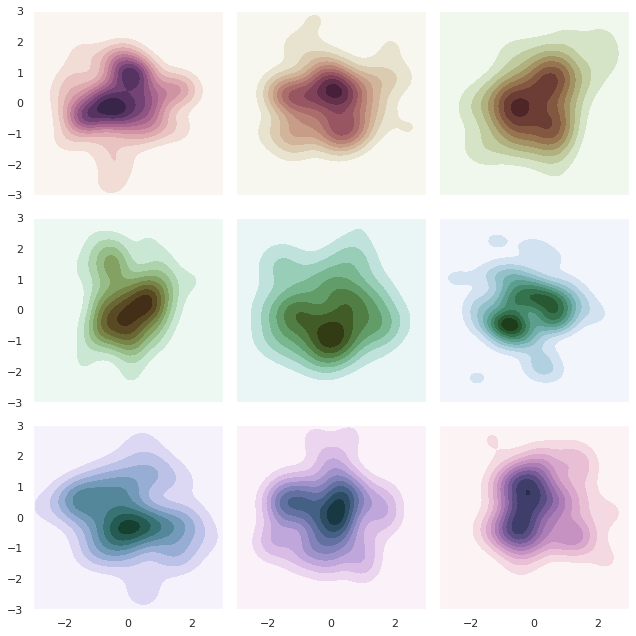

In [128]:
#Set subplots
#set the figure size
#share settings for the x and y axes between subplots
fig, axes = plt.subplots(3,3,figsize = (9,9), sharex=True,sharey = True)

#For each axis and starting point in the flattened array of the axes and
#a sample of evenly spaced numbers from 0 to 3
for ax, s in zip(axes.flat,np.linspace(0,3,10)):
  #Create a colormap for each graph
  cmap = sns.cubehelix_palette(start = s, light = 1, as_cmap = True)

  #Create the random two variable data as a kde plot
  x,y = rs.randn(2,50)
  sns.kdeplot(x,y,cmap=cmap, shade = True, cut = 5, ax = ax)
  ax.set(xlim = (-3,3), ylim = (-3,3))

fig.tight_layout()

cmap:
two random variables
[ 0.36867331 -0.39333881  0.02874482  1.27845186  0.19109907  0.04643655
 -1.35985614  0.74625357  0.64548418  2.16325472 -0.30777823  0.21915033
  0.24938368  1.57745328 -0.09529553  0.27902153  0.60789651  0.18660912
 -0.44643361  0.19408999  1.07363175 -1.0265153   0.13296967 -0.70012081
  1.19504663 -1.5231869  -0.55892185  0.37721188  1.56552403 -0.06575026
 -0.55519953  1.88115707 -1.4480139  -2.19880596  0.44001445 -0.50205422
 -1.02123282  0.70835645  0.24380071 -0.56407863 -1.2803044   0.87245733
  0.65020118 -0.09917586  1.846637   -1.07008477 -1.52552517 -0.69190807
 -0.04558602  0.24333945]
[-0.24123606  0.3520554  -1.25153942  1.4437646  -0.08215118  1.11729583
  0.34272535  0.45675322  0.56976728  0.44770856  0.64272276  1.32915253
  0.19652117  0.70900376 -0.08973569  1.44011722 -0.6763923   1.80094043
 -0.04015795 -1.4307751   0.12810441 -0.68105166  0.84064355 -0.65262398
 -0.44618343 -1.88954073 -0.45230632 -2.42387933 -1.58390282  0.7604146

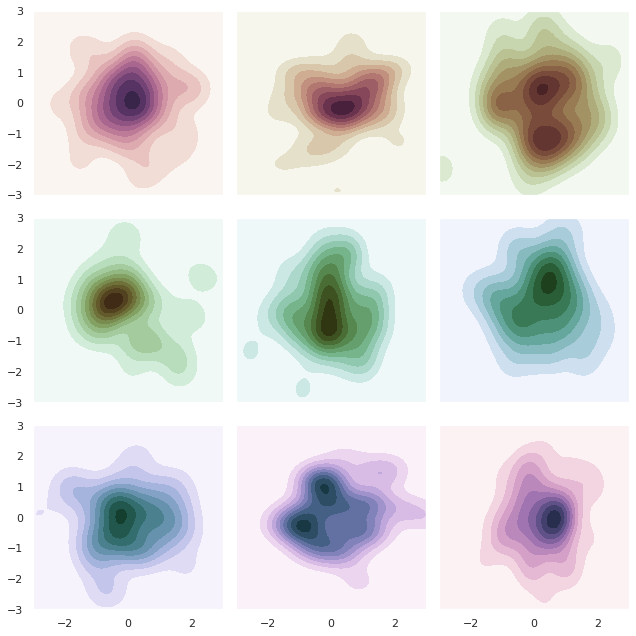

In [129]:
fig, axes = plt.subplots(3,3,figsize = (9,9), sharex=True,sharey = True)

#For each axis and starting point in the flattened array of the axes and
#a sample of evenly spaced numbers from 0 to 3
for ax, s in zip(axes.flat,np.linspace(0,3,10)):
  #Create a colormap for each graph
  cmap = sns.cubehelix_palette(start = s, light = 1, as_cmap = True)
  print("cmap:")
  print(cmap)
  #Create the random two variable data as a kde plot
  x,y = rs.randn(2,50)
  print("two random variables")
  print(x)
  print(y)
  sns.kdeplot(x,y,cmap=cmap, shade = True, cut = 5, ax = ax)
  ax.set(xlim = (-3,3), ylim = (-3,3))

fig.tight_layout()

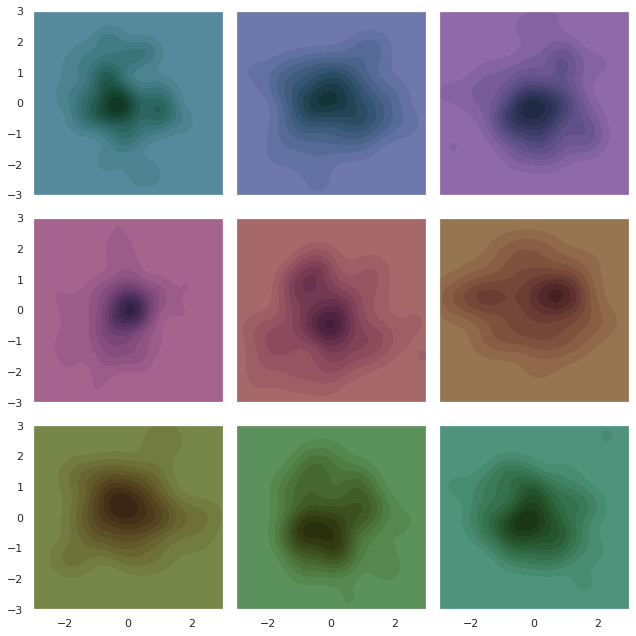

In [134]:
#Changed light in cmap
fig, axes = plt.subplots(3,3,figsize = (9,9), sharex=True,sharey = True)

#For each axis and starting point in the flattened array of the axes and
#a sample of evenly spaced numbers from 0 to 3
for ax, s in zip(axes.flat,np.linspace(0,3,10)):
  #Create a colormap for each graph
  cmap = sns.cubehelix_palette(start = s-1, light = 0.5, as_cmap = True)
  #Create the random two variable data as a kde plot
  x,y = rs.randn(2,50)
  sns.kdeplot(x,y,cmap=cmap, shade = True, cut = 5, ax = ax)
  ax.set(xlim = (-3,3), ylim = (-3,3))

fig.tight_layout()

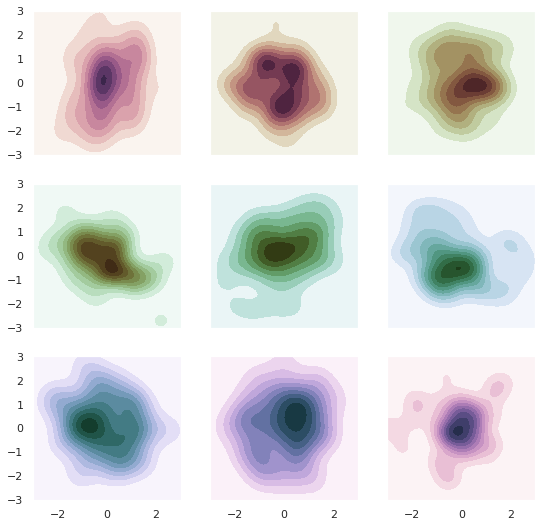

In [135]:
#Not tight
fig, axes = plt.subplots(3,3,figsize = (9,9), sharex=True,sharey = True)

#For each axis and starting point in the flattened array of the axes and
#a sample of evenly spaced numbers from 0 to 3
for ax, s in zip(axes.flat,np.linspace(0,3,10)):
  #Create a colormap for each graph
  cmap = sns.cubehelix_palette(start = s, light = 1, as_cmap = True)
  #Create the random two variable data as a kde plot
  x,y = rs.randn(2,50)
  sns.kdeplot(x,y,cmap=cmap, shade = True, cut = 5, ax = ax)
  ax.set(xlim = (-3,3), ylim = (-3,3))

#fig.tight_layout()

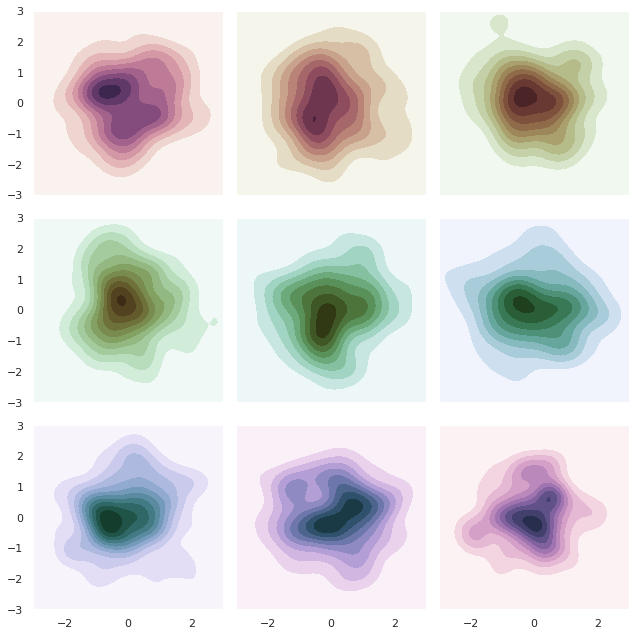

In [136]:
#larger rand int range
fig, axes = plt.subplots(3,3,figsize = (9,9), sharex=True,sharey = True)

#For each axis and starting point in the flattened array of the axes and
#a sample of evenly spaced numbers from 0 to 3
for ax, s in zip(axes.flat,np.linspace(0,3,10)):
  #Create a colormap for each graph
  cmap = sns.cubehelix_palette(start = s, light = 1, as_cmap = True)
  #Create the random two variable data as a kde plot
  x,y = rs.randn(2,100)
  sns.kdeplot(x,y,cmap=cmap, shade = True, cut = 5, ax = ax)
  ax.set(xlim = (-3,3), ylim = (-3,3))

fig.tight_layout()

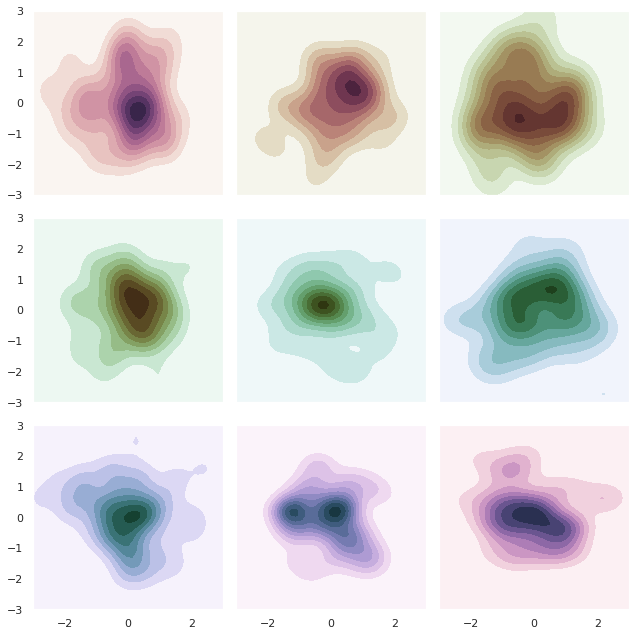

In [137]:
#larger cut
fig, axes = plt.subplots(3,3,figsize = (9,9), sharex=True,sharey = True)

#For each axis and starting point in the flattened array of the axes and
#a sample of evenly spaced numbers from 0 to 3
for ax, s in zip(axes.flat,np.linspace(0,3,10)):
  #Create a colormap for each graph
  cmap = sns.cubehelix_palette(start = s, light = 1, as_cmap = True)
  #Create the random two variable data as a kde plot
  x,y = rs.randn(2,50)
  sns.kdeplot(x,y,cmap=cmap, shade = True, cut = 10, ax = ax)
  ax.set(xlim = (-3,3), ylim = (-3,3))

fig.tight_layout()

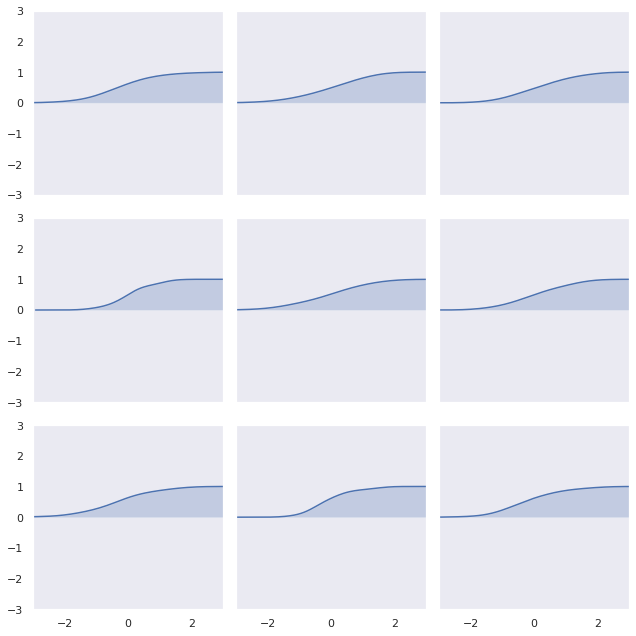

In [140]:
#smaller cut values result in more strict rules to count as a value in the graph
#larger cut
#Single variable kde
fig, axes = plt.subplots(3,3,figsize = (9,9), sharex=True,sharey = True)

#For each axis and starting point in the flattened array of the axes and
#a sample of evenly spaced numbers from 0 to 3
for ax, s in zip(axes.flat,np.linspace(0,3,10)):
  #Create a colormap for each graph
  cmap = sns.cubehelix_palette(start = s, light = 1, as_cmap = True)
  #Create the random two variable data as a kde plot
  x,y = rs.randn(2,50)
  sns.kdeplot(x, shade = True, cut = 5, ax = ax, cumulative=True)
  ax.set(xlim = (-3,3), ylim = (-3,3))

fig.tight_layout()